In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Load the dataset
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [ ]:
df.isnull().sum()

,0
YearsExperience,0
Salary,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Compute Mean and Variance
mean_salary = np.mean(df['Salary'])
variance_salary = np.var(df['Salary'])

mean_years = np.mean(df['YearsExperience'])
variance_years = np.var(df['YearsExperience'])


print("Mean Salary:", mean_salary)
print("Variance Salary:", variance_salary)

print("Mean Years of Experience:", mean_years)
print("Variance Years of Experience:", variance_years)

Mean Salary: 76003.0
Variance Salary: 726499261.7333333
Mean Years of Experience: 5.3133333333333335
Variance Years of Experience: 7.785155555555554


In [ ]:
# Compute Beta (Slope) and Alpha (Intercept):
# Use the formulas for linear regression:

n = len(df)
numerator = n * sum(df['YearsExperience'] * df['Salary']) - sum(df['YearsExperience']) * sum(df['Salary'])
denominator = n * sum(df['YearsExperience'] ** 2) - (sum(df['YearsExperience'])) ** 2

beta = numerator / denominator
alpha = mean_salary - beta * mean_years

print(f"Alpha (Intercept): {alpha}")
print(f"Beta (Slope): {beta}")

Alpha (Intercept): 25792.20019866869
Beta (Slope): 9449.962321455077


Y = b0 + bX1
b0 =  25792.2
b1 = 9449.9
Y = 25792.2 + (9449.9 * X)

In [ ]:
# Build Regression Model
X = df[['YearsExperience']]  # Independent variable
y = df['Salary']             # Dependent variable
model = LinearRegression()
model.fit(X, y)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 25792.200198668696
Coefficient: 9449.962321455076


In [ ]:
# Predict Salaries: Use the trained model to make predictions.
y_pred = model.predict(X)
df['Predicted Salary'] = y_pred
df

,YearsExperience,Salary,Predicted Salary
0,1.1,39343,36187.158752
1,1.3,46205,38077.151217
2,1.5,37731,39967.143681
3,2.0,43525,44692.124842
4,2.2,39891,46582.117306
5,2.9,56642,53197.090931
6,3.0,60150,54142.087163
7,3.2,54445,56032.079627
8,3.2,64445,56032.079627
9,3.7,57189,60757.060788


In [ ]:
r2 = r2_score(y, y_pred)
print(f"R-Squared Value: {r2}")

R-Squared Value: 0.9569566641435086


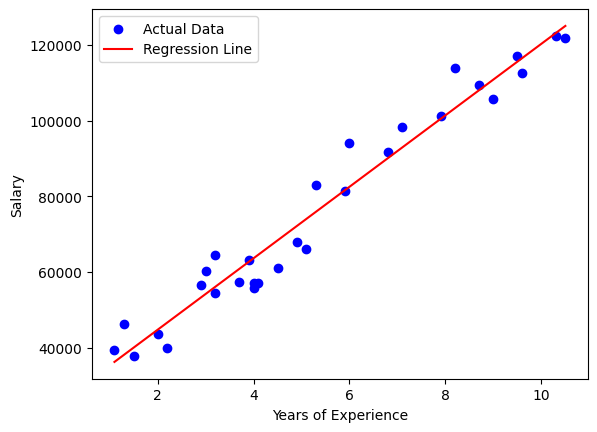

In [ ]:
# Visualize the Results of Linear Regression Model
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Actual Data')
plt.plot(df['YearsExperience'], y_pred, color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()